<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Session 6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

# import the XGBoost function for classification
from xgboost import XGBClassifier

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# read the data
df_seed = pd.read_csv('seedtype_data.csv')

# display the first five rows of the data
df_seed.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0.0
1,12.13,13.73,5.394,3.745,5.220,0.0
2,14.86,14.67,NaN,3.258,5.351,0.0
3,15.69,14.75,5.527,3.514,5.046,0.0
4,19.94,16.92,6.675,3.763,6.550,1.0


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any record where no data have been reported? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# isna() returns the boolean output
na_data = df_seed.isna() 

# seperate the indicating values for each record 
# all() returns whether all elements are True over the given axis 
df_null = na_data.all(axis='columns') == True

# obtain a list of all records where indicating value is true 
df_null.index[df_null == True].tolist()

[8, 30, 197]

The above output shows that there are 3 null rows in the data. Use the obtained list of indices to eliminate the empty records from the data. 

In [5]:
# use 'dropna()' to drop the empty rows from the dataframe
# 'axis = 0' represents the row
# 'how = all' drops the row with all the null entries 
df_seed = df_seed.dropna(axis = 0, how = 'all')

# check the dimensions of the data after removing the empty rows
df_seed.shape

(199, 6)

**Interpretation:** The above output shows that there are no empty records in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use the visualization technique to identify the variables with missing data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

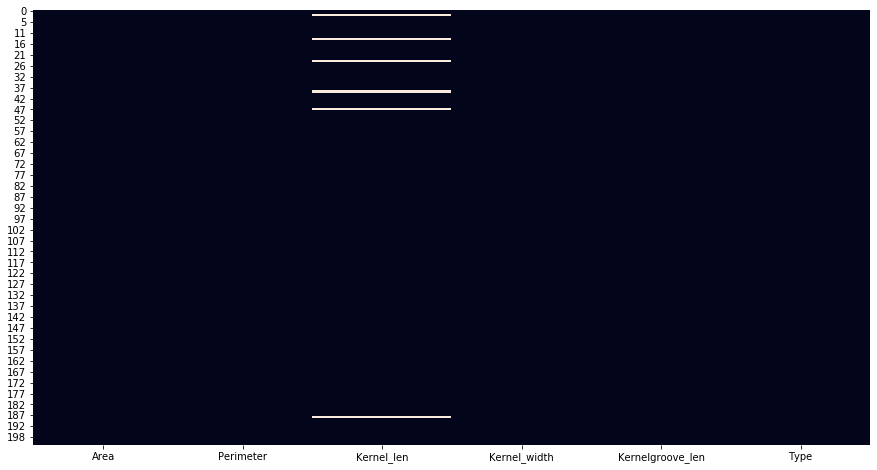

In [6]:
# plot a heatmap for the missing values in the data
# cbar: specify whether to display the color bar or not
sns.heatmap(df_seed.isnull(), cbar = False)

# display the plot
plt.show()

**Interpretation:** The above plot shows the variable `Kernel_len` contains missing data. The black color shows the non-null data and the cream color represents the missing data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Use the appropriate technique to replace the missing data in the variable representing the length of a wheat kernel
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# check the number of null values in the variable 'Kernel_len'
# the 'isnull()' returns the boolean output for the presence of missing value
# the 'sum()' returns the total number of missing values in the variable
print('Null values in the original variable:', df_seed['Kernel_len'].isnull().sum())

# check the statistical summary of the variable 'Kernel_len'
df_seed['Kernel_len'].describe()

Null values in the original variable: 6


count    193.000000
mean       5.651036
std        0.445302
min        4.899000
25%        5.267000
50%        5.554000
75%        6.006000
max        6.675000
Name: Kernel_len, dtype: float64

As we can see that there is no significant difference between the `mean` and `median` of the kernel length. We replace the missing values with the `mean` of the variable.

In [8]:
# replace the missing data with mean value 
# use 'fillna()' to fill the missing data
df_seed['Kernel_len'] = df_seed['Kernel_len'].fillna(df_seed['Kernel_len'].mean())

# check the number of null values after replacing the values
# the 'isnull()' returns the boolean output for the presence of missing value
# the 'sum()' returns the total number of missing values in the variable
print("Null values after replacement:", df_seed['Kernel_len'].isnull().sum())

Null values after replacement: 0


**Interpretation:** The above output shows that there is no missing value in the variable representing the length of a wheat kernel.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the variables containing extreme values and remove such observations, if present
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Split the dependent and independent variables.

In [9]:
# split the target and independent variables
# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Type' using drop()
# 'axis = 1' drops the specified column
df_feature = df_seed.drop('Type', axis = 1)

# store the target variable 'Type' in a dataframe 'df_target'
df_target = df_seed['Type']

#### Plot a boxplot to visualize the outliers in all the independent variables.

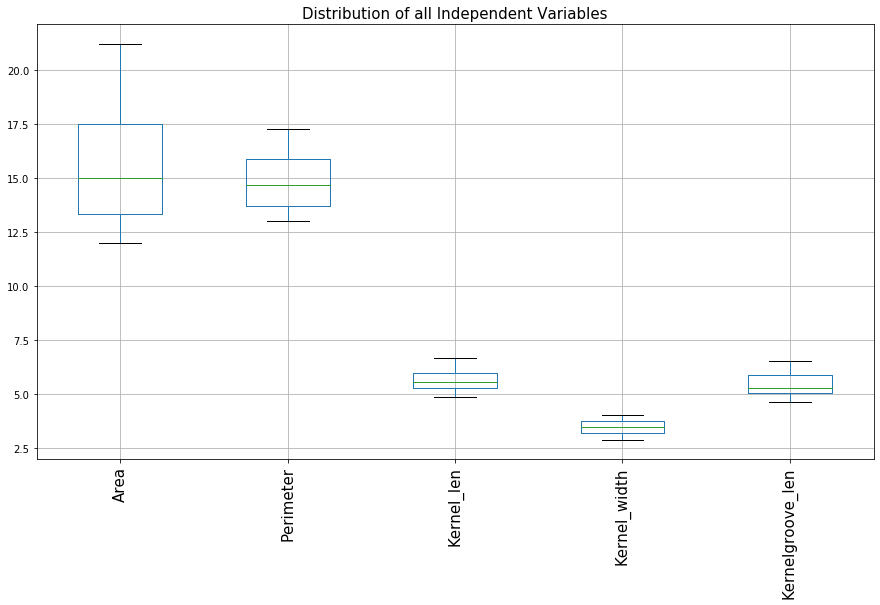

In [10]:
# plot a boxplot to visualize the outliers in all the independent variables
df_feature.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Interpretation:**  The above plot shows that none of the variables in the data contains extreme observations.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Apply the gradient boosting on 80% of the data with 250 estimators each of maximum depth 2. Also, calculate the precision and sensitivity using the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Split the data in the train and test set.

In [11]:
# consider the dataframe 'df_feature' of independent variables and 'df_target' for target variable
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, random_state = 1, test_size = 0.2)

#### Build a gradient boosting model on a training dataset.

In [12]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each time you run the code
gboost_model = GradientBoostingClassifier(n_estimators = 250, max_depth = 2, random_state = 1)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Calculate the `Precision` and `Sensitivity` using confusion matrix

In [13]:
# predict the values of target variable
y_pred = gboost_model.predict(X_test)

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# identify each grid in the confusion matrix in terms of correct and wrong predictions 
# True Negatives are denoted by 'TN'
TN = cm[0,0]

# True Positives are denoted by 'TP'
TP = cm[1,1]

# False Positives are denoted by 'FP'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
FN = cm[1,0]

**Precision:**

In [14]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.8333333333333334

**Sensitivity:**

In [15]:
# calculate the sensitivity
sensitivity = TP / (TP+FN)

# print the value
sensitivity

1.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Create 80 stumps using AdaBoost and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the train and test set from Q5.

#### Build an Adaboost model on a training dataset.

In [16]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each time you run the code
ada_model = AdaBoostClassifier(n_estimators = 80, random_state = 1)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=80, random_state=1)

#### Plot the ROC curve along with the AUC score.

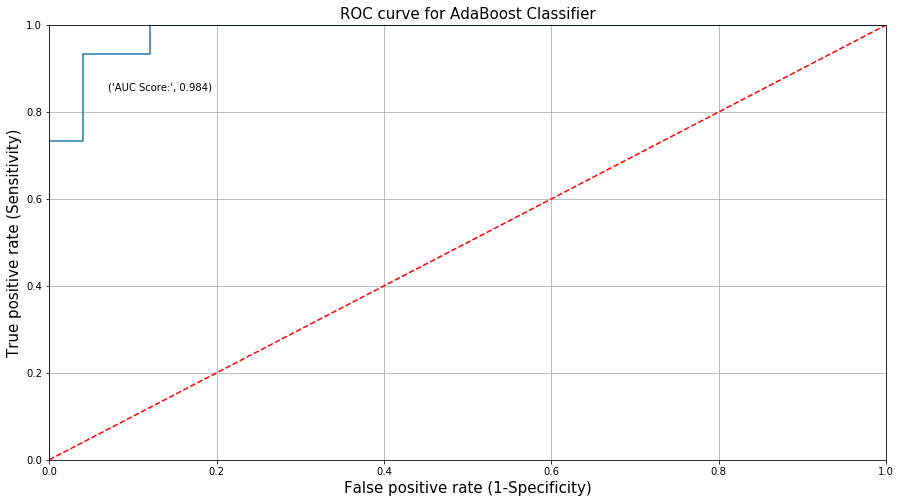

In [17]:
# predict the probability values for target 
# consider only the probabilities of positive class by using the subset '[:,1]'
y_pred_prob = ada_model.predict_proba(X_test)[:, 1]

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for AdaBoost Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.07, y = 0.85, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier is away from the dotted line; with the AUC score 0.984.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Select the optimal maximum depth from the given values for 180 base learners to build the gradient boosting classifier (consider 3-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth = [2, 3, 4, 5, 6, 7, 8]

Consider the train and test set in Q5.

In [18]:
# given list of values for maximum depth
depth = [2, 3, 4, 5, 6, 7, 8]

# create a dictionary with hyperparameter and its values
# max_depth: pass the list 'depth' as the maximum tree depth for base learners
tuning_parameters = {'max_depth': depth}

# instantiate the 'GradientBoostingClassifier' 
# pass the 'random_state' to obtain the same results for each time you run the code
gb_model = GradientBoostingClassifier(n_estimators = 180, random_state = 1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the Gradient boost classifier
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
gb_grid = GridSearchCV(estimator = gb_model, param_grid = tuning_parameters, cv = 3)

# fit the model on X_train and y_train using fit()
gb_grid.fit(X_train, y_train)

# get the best parameters
print('Best maximum depth for gradient boost classifier:', gb_grid.best_params_, '\n')

Best maximum depth for gradient boost classifier: {'max_depth': 4} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Build an XGBoost model on a training dataset.

Consider the train and test set in Q5.

In [19]:
# instantiate the 'XGBClassifier'
# set the learning rate as 0.4
# set te value of gamma as 3
xgb_model = XGBClassifier(learning_rate = 0.4, gamma = 3)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Plot the confusion matrix and calculate the accuracy of the model.

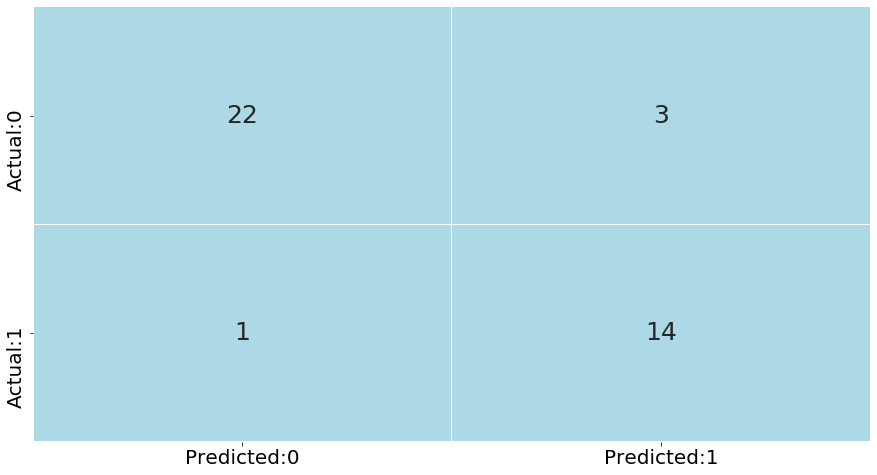

In [20]:
# predict the values of target variable
y_pred = xgb_model.predict(X_test)

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

Accuracy is the ratio correct predictions (sum of diagonal elements of the confusion matrix) to the total observations (sum of all the elements of the confusion matrix).

In [21]:
# calculate the accuracy
accuracy = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])

# print the accuracy
accuracy

0.9

**Interpretation:** The output shows that the XGBoost model is 90% accurate.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the stacking technique on 70% of the data with the 9-NN and Naive Bayes model as base learners. Consider the Adaboost model as a final estimator. Also, compute the AUC score of the model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Since we are considering the KNN model as a base learner; it is necessary to scale the data before applying the stacking technique.

#### Split the dependent and independent variables.

In [22]:
# split the target and independent variables
# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Type' using drop()
# 'axis = 1' drops the specified column
df_feature = df_seed.drop('Type', axis = 1)

# store the target variable 'Type' in a dataframe 'df_target'
df_target = df_seed['Type']

#### Scale the data.

In [23]:
# initialize the StandardScaler
X_scaler = StandardScaler()

# consider the dataframe 'df_feature' to scale all the independent variables
num_scaled = X_scaler.fit_transform(df_feature)

# create a dataframe of scaled variables
# pass the required column names to the parameter 'columns'
df_feature_scaled = pd.DataFrame(num_scaled, columns = df_feature.columns)

#### Split the data in the train and test set.

In [24]:
# consider the dataframe 'df_feature_scaled' of independent variables and 'df_target' for target variable
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(df_feature_scaled, df_target, 
                                                                                random_state = 1, test_size = 0.3)

#### Build the stacking classifier using the KNN (with K = 9) and Naive Bayes model as base learners. Consider the Adaboost classifier as a final estimator. 

In [25]:
# consider the 9-NN and Naive Bayes algorithms as base learners
# pass the value of K to the parameter, 'n_neighbors'
base_learners = [('KNN_model', KNeighborsClassifier(n_neighbors = 9)),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the AdaBoost model as the 'final_estimator'/ meta model
# pass the 'random_state' to obtain the same results for each time you run the code
stack_model_AdaBoost = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier(random_state = 1))

# fit the model on train dataset
stack_model_AdaBoost.fit(X_train_scaled, y_train_scaled)

StackingClassifier(cv=None,
                   estimators=[('KNN_model',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=9,
                                                     p=2, weights='uniform')),
                               ('NB_model',
                                GaussianNB(priors=None, var_smoothing=1e-09))],
                   final_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                      base_estimator=None,
                                                      learning_rate=1.0,
                                                      n_estimators=50,
                                                      random_stat

**Calculate the AUC score of the model.**

In [26]:
# calculate the predicted probabilities of target variable
# consider only the probabilities of positive class by using the subset '[:,1]'
y_pred_prob = stack_model_AdaBoost.predict_proba(X_test_scaled)[:, 1]

# use 'roc_auc_score()' to calculate the AUC score 
print('AUC score for the model with AdaBoost as final estimator:', roc_auc_score(y_test_scaled, y_pred_prob))

AUC score for the model with AdaBoost as final estimator: 0.9017094017094017


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the base learners in Q9 and build a stacking model with the XGBoost as final estimator. Compute the AUC score of the model and compare it with the result of Q9 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Build the stacking classifier using the KNN (with K = 9) and Naive bayes model as base learners. Consider the XGBoost classifier as final estimator. 

In [27]:
# consider the 9-NN and Naive bayes algorithms as base learners
# pass the value of K to the parameter, 'n_neighbors'
base_learners = [('KNN_model', KNeighborsClassifier(n_neighbors = 9)),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the XGBoost model as the 'final_estimator'/ meta model
stack_model_XGBoost = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model_XGBoost.fit(X_train_scaled, y_train_scaled)

StackingClassifier(cv=None,
                   estimators=[('KNN_model',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=9,
                                                     p=2, weights='uniform')),
                               ('NB_model',
                                GaussianNB(priors=None, var_smoothing=1e-09))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=No...
                                                 max_depth=None,
                                                 min_child_weight=Non

**Calculate the AUC score of the model**

In [28]:
# calculate the predicted probabilities of target variable
# consider only the probabilities of positive class by using the subset '[:,1]'
y_pred_prob = stack_model_XGBoost.predict_proba(X_test_scaled)[:, 1]

# use 'roc_auc_score()' to calculate the AUC score 
print('AUC score for the model with XGBoost as final estimator:', roc_auc_score(y_test_scaled, y_pred_prob))

AUC score for the model with XGBoost as final estimator: 0.9725274725274725


**Interpretation:** The output shows that the AUC score of the model with the XGBoost classifier is greater than the AUC score of the model with the AdaBoost classifier. This implies that here, the XGBoost classifier works more efficiently than the AdaBoost model.